### Import all the libraries and datatset

In [ ]:
from numpy import array
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

import warnings

import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('JPM.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,5.129630,5.018519,5.037037,1.122904,62775
1,1980-03-18,0.0,5.111111,5.037037,5.074074,1.131161,64125
2,1980-03-19,0.0,5.166667,5.111111,5.148148,1.147674,40500
3,1980-03-20,0.0,5.148148,5.092593,5.111111,1.139418,18900
4,1980-03-21,0.0,5.222222,5.111111,5.222222,1.164188,97200
5,1980-03-24,0.0,5.185185,5.092593,5.092593,1.135290,90450
6,1980-03-25,0.0,5.111111,5.055556,5.074074,1.131161,72225
7,1980-03-26,0.0,5.148148,5.037037,5.111111,1.139418,31725
8,1980-03-27,0.0,5.092593,4.925926,5.074074,1.131161,62100
9,1980-03-28,0.0,5.074074,4.925926,5.018519,1.118777,84375


### Define a function that extracts features (lagged values)

In [ ]:
def train_split_sequence(sequence, steps):
  X, y = list(), list()
  for start in range(0, len(sequence)-30):
    end_index = start + steps
    if end_index > len(sequence)-1:
      break
    sequence_x, sequence_y = sequence[start: end_index], sequence[end_index]
    X.append(sequence_x)
    y.append(sequence_y)
  return array(X), array(y)


def test_split_sequence(sequence, steps):
  X, y = list(), list()
  for start in range(len(sequence)-30, len(sequence)):
    end_index = start + steps
    if end_index > len(sequence)-1:
      break
    sequence_x, sequence_y = sequence[start: end_index], sequence[end_index]
    X.append(sequence_x)
    y.append(sequence_y)
  return array(X), array(y)

### Initializing Sequence, steps and reshaping the output to input to our CNN Model

In [ ]:
raw_sequence = df['Close']
steps = 30

X, y = train_split_sequence(raw_sequence, steps)

In [ ]:
print("**************************************")
print("The input to our CNN is Close Stock Price of JP Morgan:\n", raw_sequence)
print("**************************************")
print("The features (X), lagged values of time series, for our CNN Model")
print(X)
print("**************************************")
print("The respective observed values (y) of sequence for training our CNN Model")
print(y)
print("**************************************")

**************************************
The input to our CNN is Close Stock Price of JP Morgan:
 0          5.037037
1          5.074074
2          5.148148
3          5.111111
4          5.222222
            ...    
10754    131.449997
10755    129.740005
10756    135.080002
10757    135.300003
10758    133.910004
Name: Close, Length: 10759, dtype: float64
**************************************
The features (X), lagged values of time series, for our CNN Model
[[  5.037037   5.074074   5.148148 ...   5.296296   5.222222   5.333333]
 [  5.074074   5.148148   5.111111 ...   5.222222   5.333333   5.351852]
 [  5.148148   5.111111   5.222222 ...   5.333333   5.351852   5.407407]
 ...
 [106.160004 104.5      107.730003 ... 131.369995 131.449997 129.740005]
 [104.5      107.730003 112.769997 ... 131.449997 129.740005 135.080002]
 [107.730003 112.769997 110.389999 ... 129.740005 135.080002 135.300003]]
**************************************
The respective observed values (y) of sequence for tr

### Reshaping the X matrices

In [ ]:
features = 1
X = X.reshape((X.shape[0], X.shape[1], features))

print("After reshaping, the shape of input X")
print(X.shape)
print("**************************************")
print("**************************************")
print("The final form of input feature matrix X is")
print(X)
print("**************************************")
print("**************************************")
print("Feature matrix X is ready for input to CNN model. We have used feature engineering to convert\n"
,"a sequence to matrix with image matrix shape to find patterns in sequence")
print("**************************************")
print("**************************************")

After reshaping, the shape of input X
(10729, 30, 1)
**************************************
**************************************
The final form of input feature matrix X is
[[[  5.037037]
  [  5.074074]
  [  5.148148]
  ...
  [  5.296296]
  [  5.222222]
  [  5.333333]]

 [[  5.074074]
  [  5.148148]
  [  5.111111]
  ...
  [  5.222222]
  [  5.333333]
  [  5.351852]]

 [[  5.148148]
  [  5.111111]
  [  5.222222]
  ...
  [  5.333333]
  [  5.351852]
  [  5.407407]]

 ...

 [[106.160004]
  [104.5     ]
  [107.730003]
  ...
  [131.369995]
  [131.449997]
  [129.740005]]

 [[104.5     ]
  [107.730003]
  [112.769997]
  ...
  [131.449997]
  [129.740005]
  [135.080002]]

 [[107.730003]
  [112.769997]
  [110.389999]
  ...
  [129.740005]
  [135.080002]
  [135.300003]]]
**************************************
**************************************
Feature matrix X is ready for input to CNN model. We have used feature engineering to convert
 a sequence to matrix with image matrix shape to find patte

### Define CNN Model

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, features)))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(1))

### Implement CNN Model fitting

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 29, 64)            192       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 14, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 896)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               89700     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 89,993
Trainable params: 89,993
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
336/336 [==============================] - 3s 7ms/step - loss: 27.8053
Epoch 2/50
336/336 [==============================] - 3s 8ms/step - loss: 6.5897
Epoch 3/50
336/336 [==============================] - 2s 7ms/step - loss: 5.4516
Epoch 4/50
336/336 [==============================] - 2s 7ms/step - loss: 5.0899
Epoch 5/50
336/336 [==============================] - 2s 7ms/step - loss: 4.8151
Epoch 6/50
336/336 [==============================] - 3s 8ms/step - loss: 4.0007
Epoch 7/50
336/336 [==============================] - 3s 8ms/step - loss: 4.5194
Epoch 8/50
336/336 [==============================] - 2s 7ms/step - loss: 4.2733
Epoch 9/50
336/336 [==============================] - 2s 7ms/step - loss: 3.6295
Epoch 10/50
336/336 [==============================] - 2s 7ms/step - loss: 3.5156
Epoch 11/50
336/336 [==============================] - 2s 7ms/step - loss: 4.0309
Epoch 12/50
336/336 [==============================] - 2s 7ms/step - loss: 3.6643
Epoch 13/50
336/336 [===

### Predicting the Future Values

In [ ]:
x_test, y_test = train_split_sequence(raw_sequence, steps)

x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], features))
y_pred = model.predict(x_test, verbose=0)

print(f"The next predicted output vs original is:")
data = pd.DataFrame(y_pred, columns=['y_pred'])
data["y_test"] = y_test
data.head()

The next predicted output vs original is:


,y_pred,y_test
0,5.110896,5.351852
1,5.068399,5.407407
2,5.198746,5.500000
3,5.210667,5.555556
4,5.319422,5.851852


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

8.377951445922687

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

timeseries_evaluation_metrics_func(y_test, y_pred)

Evaluation metric results:-
MSE is : 8.377951445922687
MAE is : 1.9807257579852404
RMSE is : 2.894469112967469
MAPE is : 158.89644829338815
R2 is : 0.993474059900318



### Plot the figure with predicted values

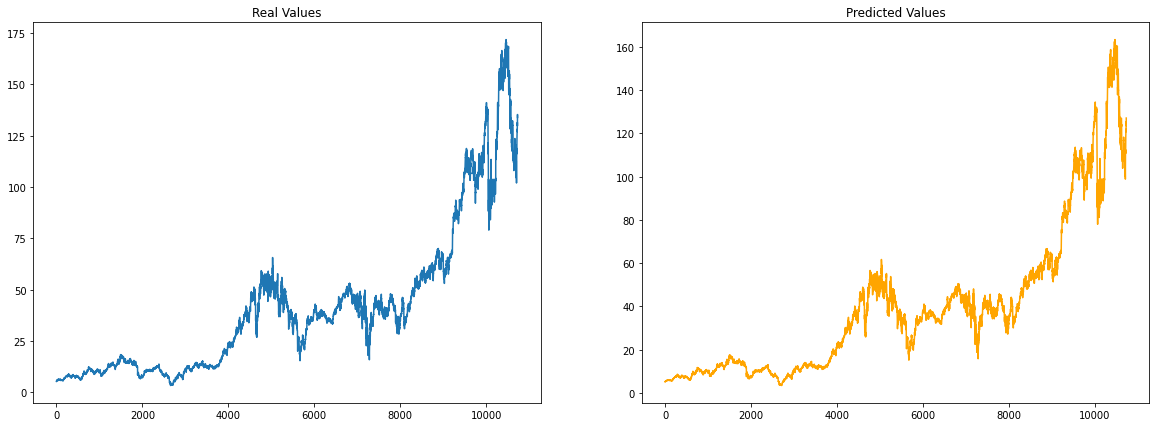

In [ ]:
import matplotlib.pyplot as plt

fig, (real, pred) = plt.subplots(1, 2, figsize=(20,7))

real.plot(y_test)
real.set_title("Real Values")

pred.plot(y_pred, color="orange")
pred.set_title("Predicted Values")

plt.show()